In [1]:
#优点
#模型依赖的支持向量比较少，说明它们都是非常精致的模型，消耗内存少。
#一旦模型训练完成，预测阶段的速度非常快。
#由于模型只受边界线附近的点的影响，因此它们对于高维数据的学习效果非常好——即使训练比样本维度还高的数据也没有问题，而这是其他算法难以企及的。
#与核函数方法的配合极具通用性，能够适用不同类型的数据。

#缺点
#随着样本量N 的不断增加，最差的训练时间复杂度会达到N**3；经过高效处理后，也只能达到N**2。因此，大样本学习的计算成本会非常高。
#训练效果非常依赖于边界软化参数C的选择是否合理。这需要通过交叉检验自行搜索；当数据集较大时，计算量也非常大。
#预测结果不能直接进行概率解释。这一点可以通过内部交叉检验进行评估（具体请参见SVC 的probability 参数的定义），但是评估过程的计算量也很大。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

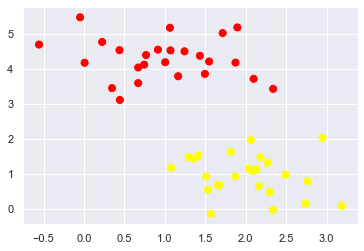

In [2]:
#生成原始数据
import sklearn.datasets.samples_generator
X, y = sklearn.datasets.samples_generator.make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [3]:
#画出SVM的决策边界
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


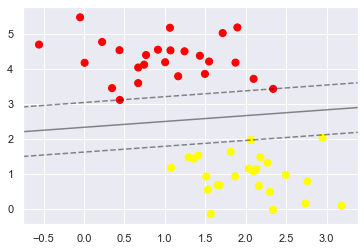

In [4]:
import sklearn.svm
model = sklearn.svm.SVC(kernel='linear', C=1E10) # "Support vector classifier"
model.fit(X, y)

    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [5]:
#支持向量机，即在边界上的点；这一点保证了：SVM对于远离边界的数据点不敏感
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [6]:
import ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

SyntaxError: invalid syntax (<ipython-input-6-1519a6e923c8>, line 1)

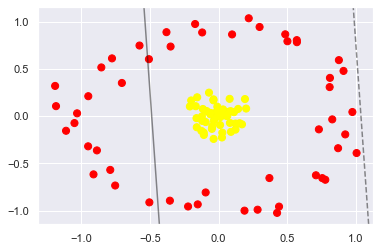

In [7]:
#核函数SVM
import sklearn.datasets.samples_generator
X, y = sklearn.datasets.samples_generator.make_circles(100, factor=.1, noise=.1)

clf = sklearn.svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
#此时线性不可分，需要引入径向基函数
r = np.exp(-(X ** 2).sum(1))


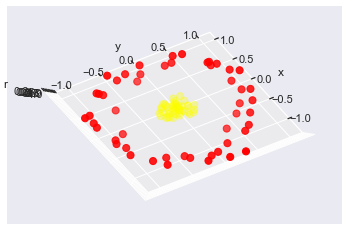

In [16]:
import ipywidgets
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

#此处图形已经变化
ipywidgets.interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=ipywidgets.fixed(X), y=ipywidgets.fixed(y));

In [17]:
clf = sklearn.svm.SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

C:\Users\hnjyz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

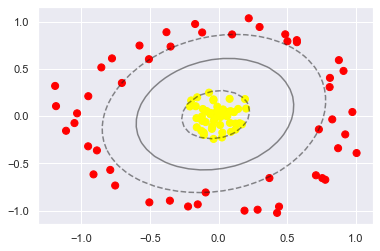

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');

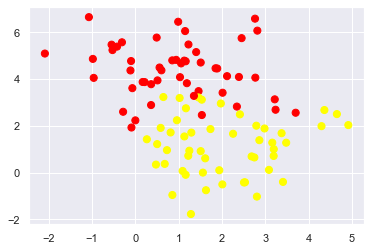

In [21]:
#3软化边界
#准备数据
X, y = sklearn.datasets.samples_generator.make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

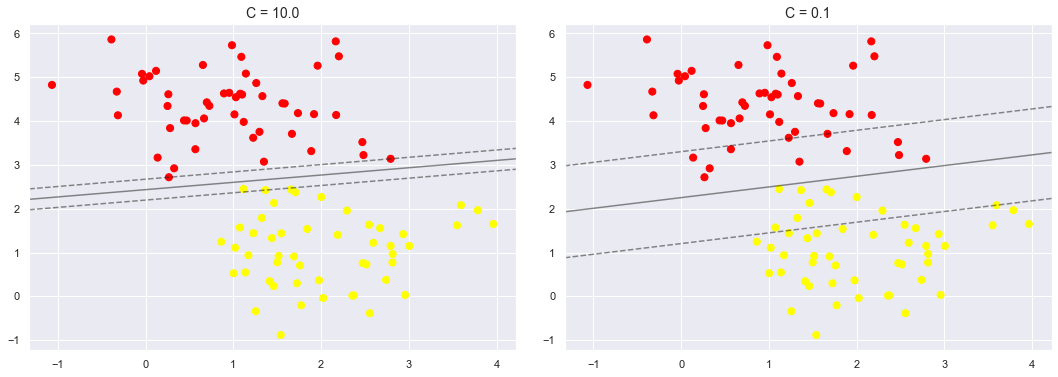

In [24]:
#画图说明不同的软化边界参数对分类的影响
X, y = sklearn.datasets.samples_generator.make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)